Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

Задание 2: (опция) . Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

Задание 3:(опция). Реализовать алгоритм градиетного бустинга, основанный на реализации решающего дерева из ДЗ4 / методички к уроку 4. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [81]:
class GBM():
    
    def __init__(self, eta=0.1, n_trees=5, max_depth=5):
        self.eta = eta
        self.max_depth = max_depth
        self.n_trees = n_trees
    
    def predict(self, X, trees_list, coef_list, eta):
        return np.array([sum([eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)])for x in X])
    
    def mse(self, y, y_pred):
        return (sum((y - y_pred) ** 2)) / len(y)
    
    def bias(self, y, z):
        return (y - z)
    
    def fit(self, X_train, y_train, X_test, 
            y_test, coefs): 
            
        
        trees = []
        train_errors = []
        test_errors = []
        
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=13)
            if len(trees) == 0:
                tree.fit(X_train, y_train)
                train_errors.append(self.mse(y_train, self.predict(X_train, trees, coefs, self.eta)))
                test_errors.append(self.mse(y_test, self.predict(X_test, trees, coefs, self.eta)))
            else:
                target = self.predict(X_train, trees, coefs, self.eta)
                tree.fit(X_train, self.bias(y_train, target))
                train_errors.append(self.mse(y_train, self.predict(X_train, trees, coefs, self.eta)))
                test_errors.append(self.mse(y_test, self.predict(X_test, trees, coefs, self.eta)))
            
            trees.append(tree)
        return trees, train_errors, test_errors

In [9]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, gb, n_trees, max_depth):
    train_prediction = gb.predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {gb.mse(y_train, train_prediction)}')

    test_prediction = gb.predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {gb.mse(y_test, test_prediction)}')

In [6]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1845.217972067238
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4333.659948681168


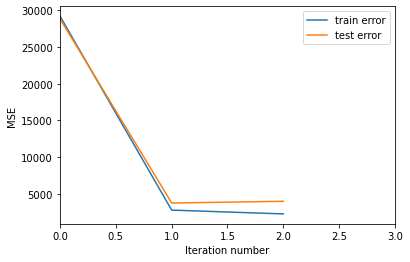

Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 16793.837847539133
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 16952.85196405071


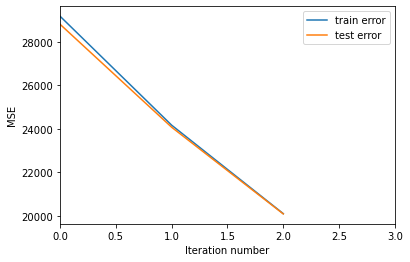

Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 27641.356890316903
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 27354.7170393401


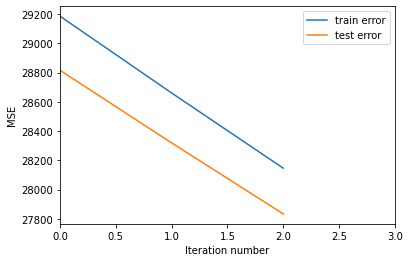

Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.001 на тренировочной выборке: 29027.968087451212
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.001 на тестовой выборке: 28666.313362904126


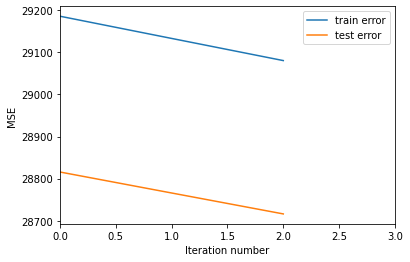

Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 1060.4478105534422
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 1 на тестовой выборке: 4788.465916471298


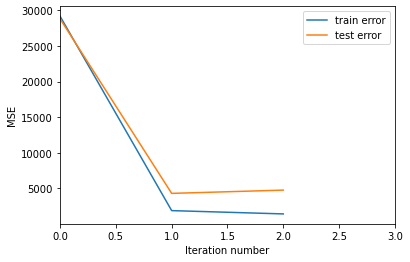

Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 16293.434773791247
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 16883.995130661115


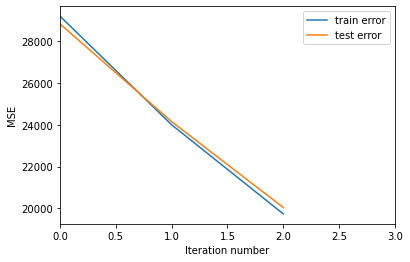

Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 27583.97634973501
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 27366.647721928333


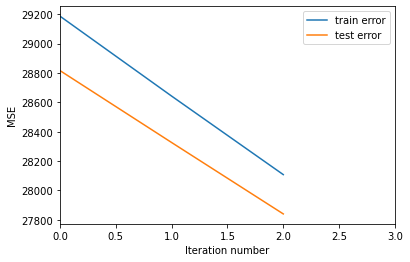

Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.001 на тренировочной выборке: 29022.27461231142
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.001 на тестовой выборке: 28668.222141733433


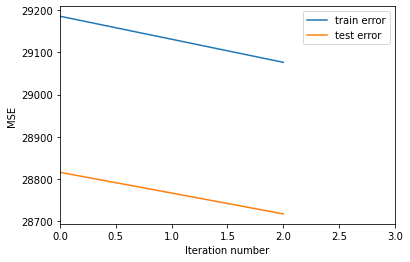

Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 1 на тренировочной выборке: 263.7167519904145
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 1 на тестовой выборке: 5042.0747733513745


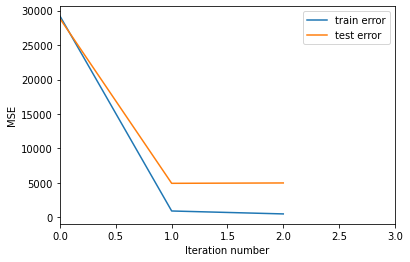

Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 15835.443873850309
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 16853.348327282332


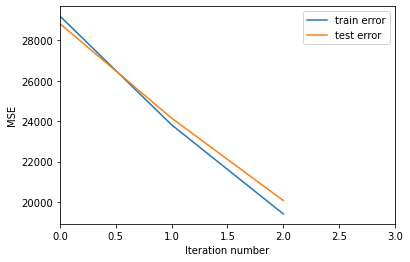

Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 27523.812987722235
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 27352.78743227834


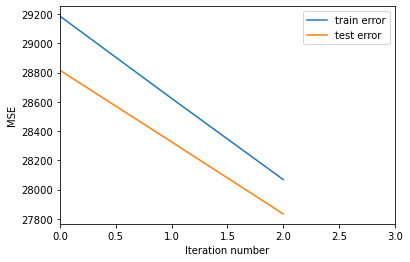

Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.001 на тренировочной выборке: 29015.96223686563
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.001 на тестовой выборке: 28665.05396308048


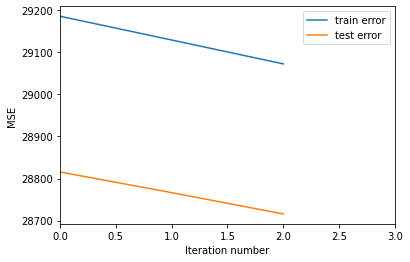

Ошибка алгоритма из 3 деревьев глубиной 9     с шагом 1 на тренировочной выборке: 14.567759436201975
Ошибка алгоритма из 3 деревьев глубиной 9     с шагом 1 на тестовой выборке: 6742.329268953746


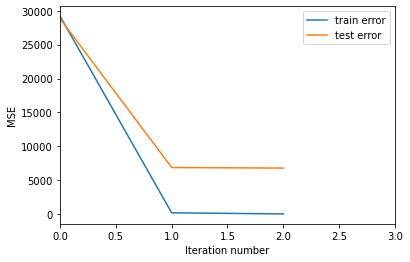

Ошибка алгоритма из 3 деревьев глубиной 9     с шагом 0.1 на тренировочной выборке: 15609.025465570914
Ошибка алгоритма из 3 деревьев глубиной 9     с шагом 0.1 на тестовой выборке: 17384.41728737054


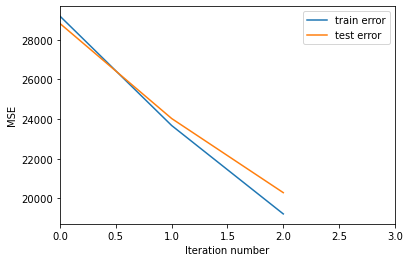

Ошибка алгоритма из 3 деревьев глубиной 9     с шагом 0.01 на тренировочной выборке: 27489.58095624624
Ошибка алгоритма из 3 деревьев глубиной 9     с шагом 0.01 на тестовой выборке: 27344.611495943154


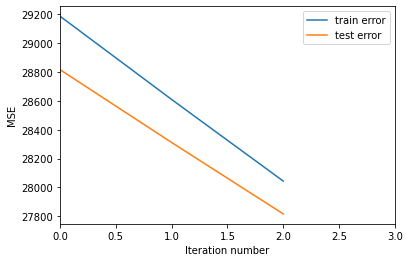

Ошибка алгоритма из 3 деревьев глубиной 9     с шагом 0.001 на тренировочной выборке: 29012.44056846697
Ошибка алгоритма из 3 деревьев глубиной 9     с шагом 0.001 на тестовой выборке: 28665.284049927483


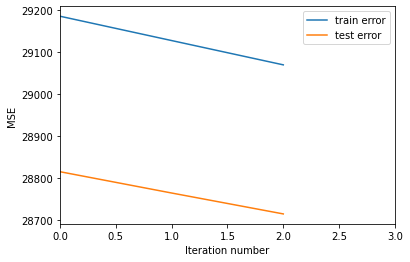

Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1601.2612551917928
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4353.988877190036


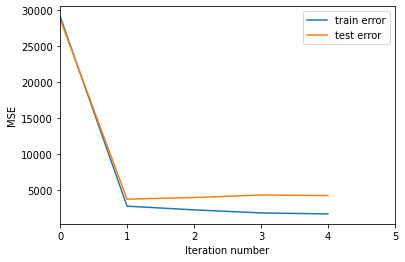

Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 11907.257345944236
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 12352.881266589844


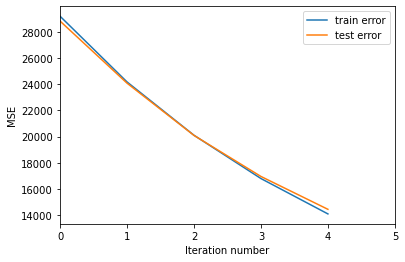

Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 26662.05058194976
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 26425.06257407169


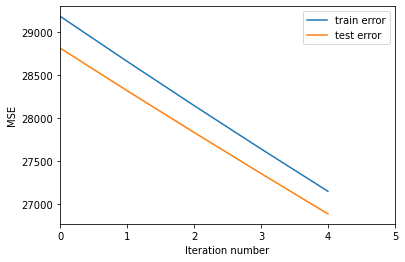

Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.001 на тренировочной выборке: 28923.192216279316
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.001 на тестовой выборке: 28567.33062574761


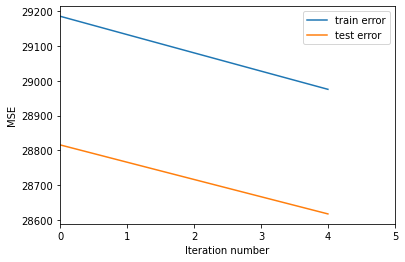

Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 611.9609148142688
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 1 на тестовой выборке: 5165.875769289246


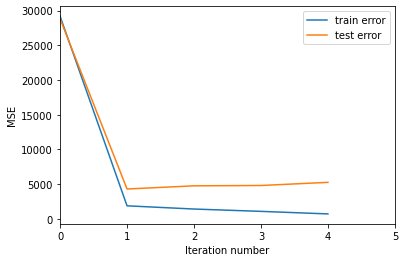

Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 11186.586766470682
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 12434.897603938394


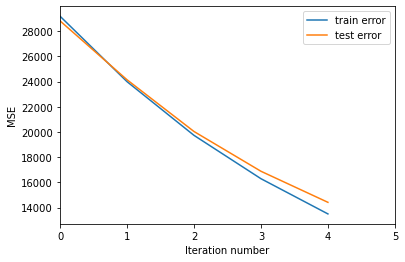

Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 26567.380661198153
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 26435.979376795203


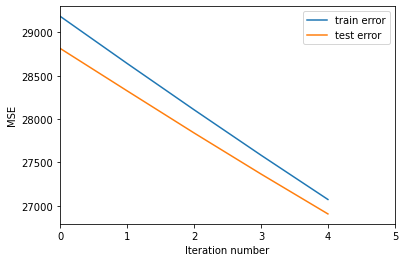

Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.001 на тренировочной выборке: 28913.67406565908
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.001 на тестовой выборке: 28570.447027570735


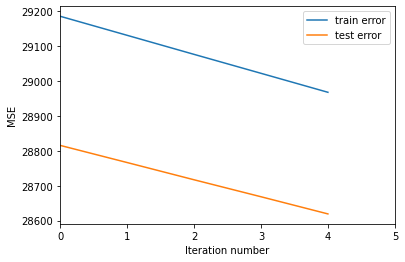

Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 1 на тренировочной выборке: 90.54888634828221
Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 1 на тестовой выборке: 5437.671840528594


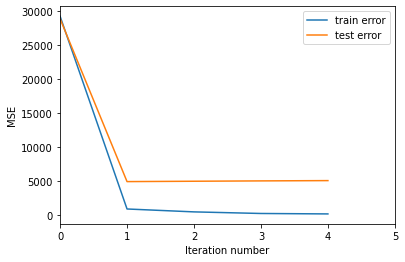

Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 10609.946790054815
Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 12338.033753105434


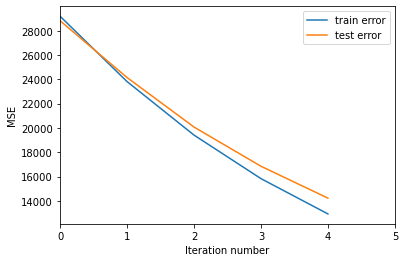

Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 26467.21630752628
Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 26394.1582273116


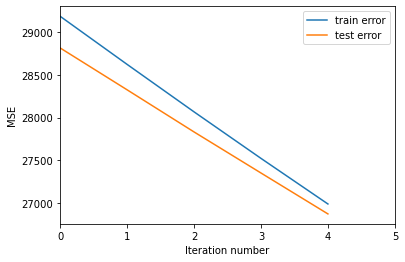

Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 0.001 на тренировочной выборке: 28902.942885816417
Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 0.001 на тестовой выборке: 28564.441858516926


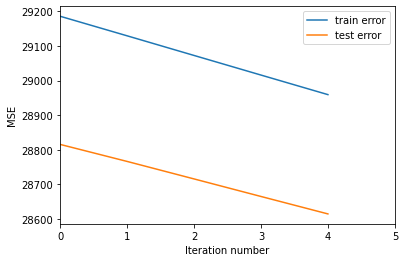

Ошибка алгоритма из 5 деревьев глубиной 9     с шагом 1 на тренировочной выборке: 0.6297246097862799
Ошибка алгоритма из 5 деревьев глубиной 9     с шагом 1 на тестовой выборке: 6727.829461751714


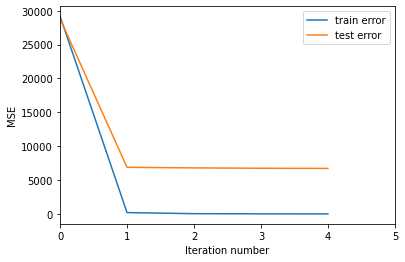

Ошибка алгоритма из 5 деревьев глубиной 9     с шагом 0.1 на тренировочной выборке: 10282.696699257358
Ошибка алгоритма из 5 деревьев глубиной 9     с шагом 0.1 на тестовой выборке: 12693.625583350573


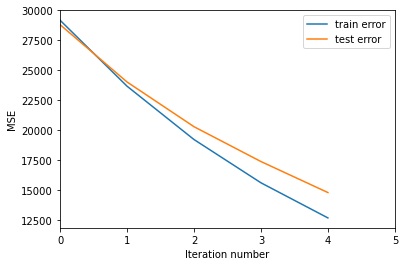

Ошибка алгоритма из 5 деревьев глубиной 9     с шагом 0.01 на тренировочной выборке: 26414.19568345662
Ошибка алгоритма из 5 деревьев глубиной 9     с шагом 0.01 на тестовой выборке: 26421.613770002776


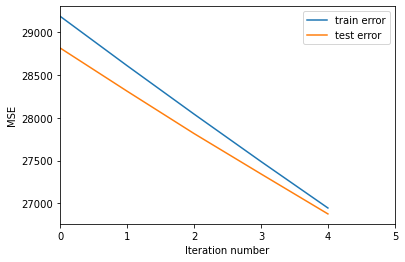

Ошибка алгоритма из 5 деревьев глубиной 9     с шагом 0.001 на тренировочной выборке: 28897.35683359191
Ошибка алгоритма из 5 деревьев глубиной 9     с шагом 0.001 на тестовой выборке: 28565.08325679209


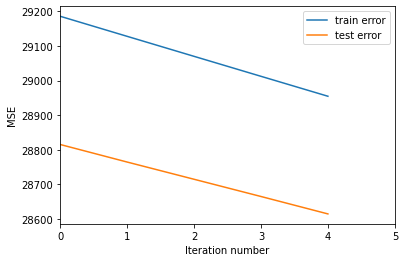

Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1201.3386059330794
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4481.605999423261


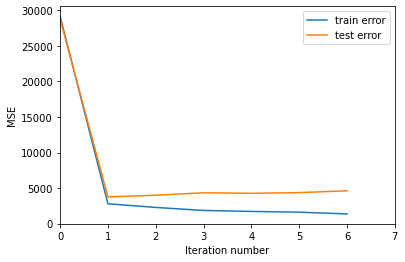

Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 8646.180094951918
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 9310.782764247386


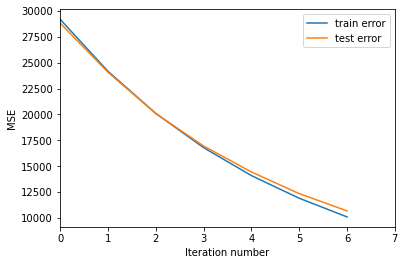

Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 25721.094757663992
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 25527.35625638267


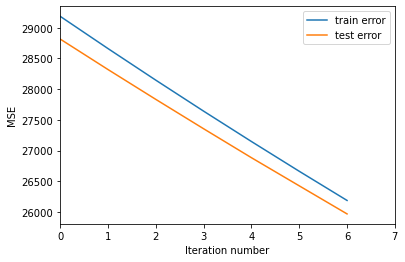

Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.001 на тренировочной выборке: 28818.834495869287
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.001 на тестовой выборке: 28468.742549502407


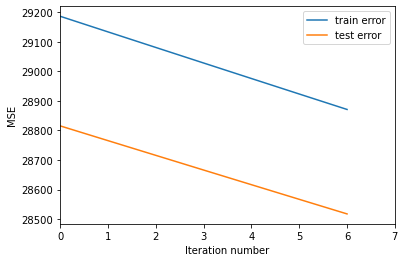

Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 296.9276434218256
Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 1 на тестовой выборке: 5473.7887564764305


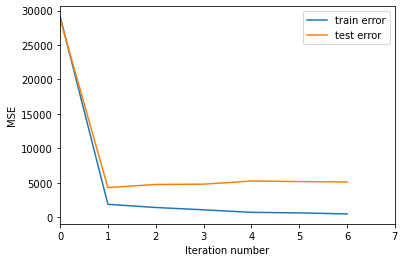

Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 7778.766298320202
Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 9489.768889105073


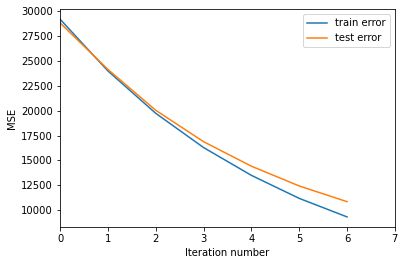

Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 25590.047409715924
Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 25528.345943818706


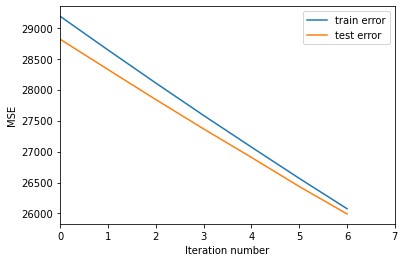

Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 0.001 на тренировочной выборке: 28805.33941531488
Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 0.001 на тестовой выборке: 28472.19164397127


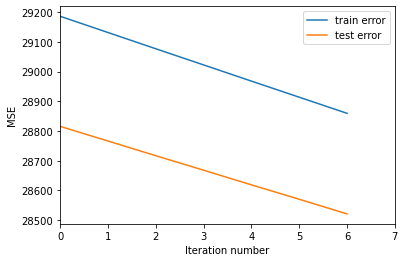

Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 1 на тренировочной выборке: 11.006854218583504
Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 1 на тестовой выборке: 5349.366721706617


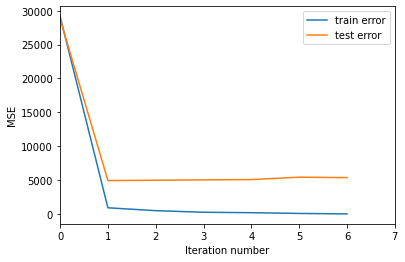

Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 7103.001959691411
Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 9401.236143291095


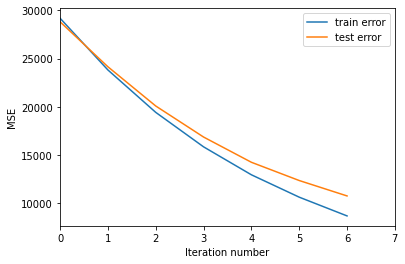

Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 25452.430471333366
Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 25484.20626319042


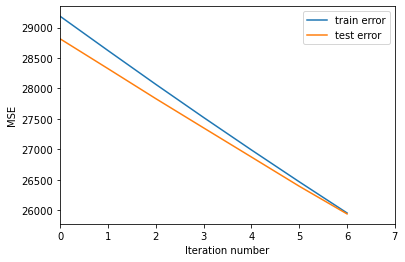

Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 0.001 на тренировочной выборке: 28790.374893592743
Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 0.001 на тестовой выборке: 28464.100193976217


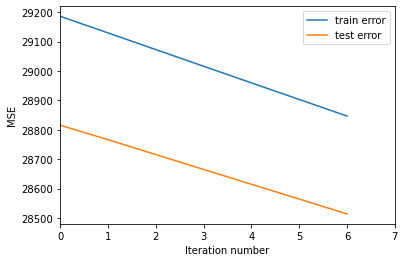

Ошибка алгоритма из 7 деревьев глубиной 9     с шагом 1 на тренировочной выборке: 0.004816766088969057
Ошибка алгоритма из 7 деревьев глубиной 9     с шагом 1 на тестовой выборке: 6729.397169980754


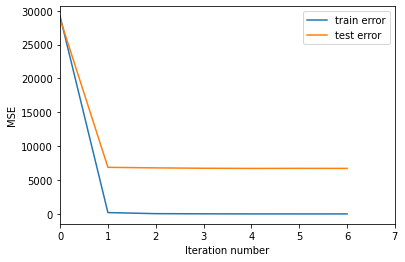

Ошибка алгоритма из 7 деревьев глубиной 9     с шагом 0.1 на тренировочной выборке: 6768.877744567989
Ошибка алгоритма из 7 деревьев глубиной 9     с шагом 0.1 на тестовой выборке: 9653.093314491085


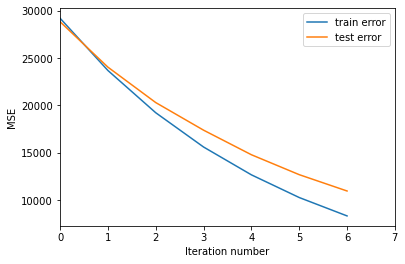

Ошибка алгоритма из 7 деревьев глубиной 9     с шагом 0.01 на тренировочной выборке: 25381.02259850558
Ошибка алгоритма из 7 деревьев глубиной 9     с шагом 0.01 на тестовой выборке: 25541.02110002716


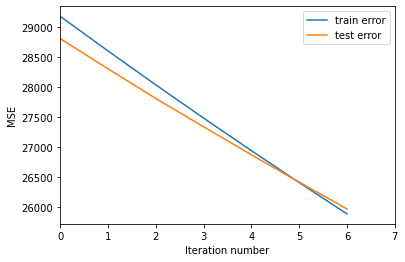

Ошибка алгоритма из 7 деревьев глубиной 9     с шагом 0.001 на тренировочной выборке: 28782.732743186556
Ошибка алгоритма из 7 деревьев глубиной 9     с шагом 0.001 на тестовой выборке: 28465.89454533972


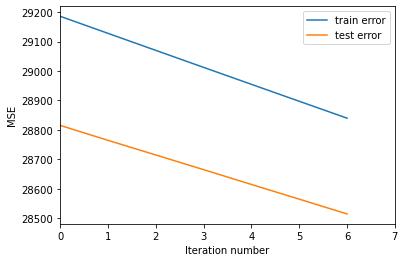

Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1051.6629013591503
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4531.7222766011055


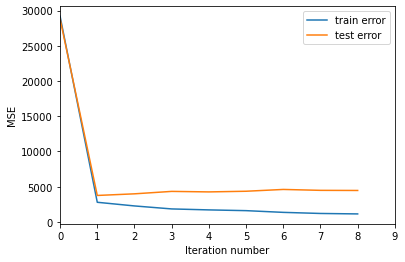

Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 6470.999447836467
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 7338.381901620273


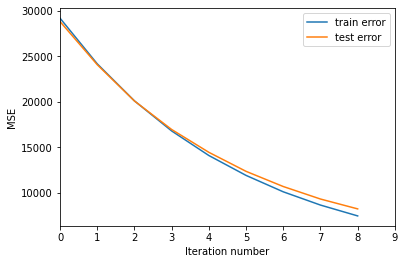

Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 24816.614221382297
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 24657.87127235218


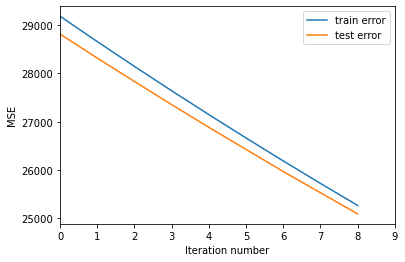

Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.001 на тренировочной выборке: 28714.89325731223
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.001 на тестовой выборке: 28370.547536458806


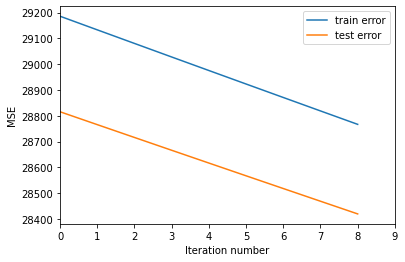

Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 206.25497977688565
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 1 на тестовой выборке: 5691.3821581589655


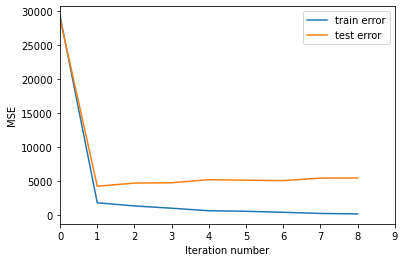

Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 5504.806079794414
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 7478.352762022563


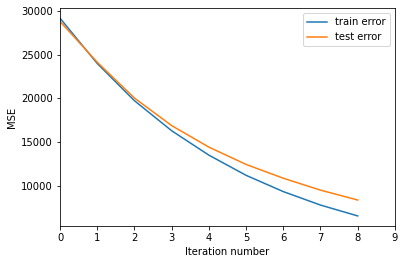

Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 24647.965764152887
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 24641.279781552286


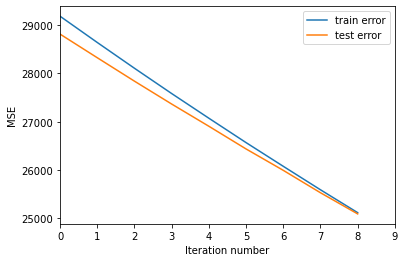

Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.001 на тренировочной выборке: 28697.644262750968
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.001 на тестовой выборке: 28374.982175231435


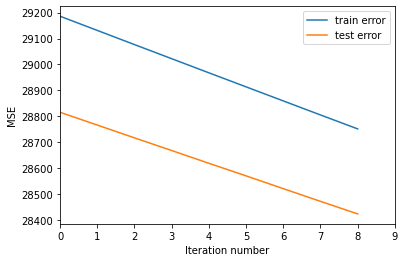

Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 1 на тренировочной выборке: 2.0366039310783473
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 1 на тестовой выборке: 5320.192602565487


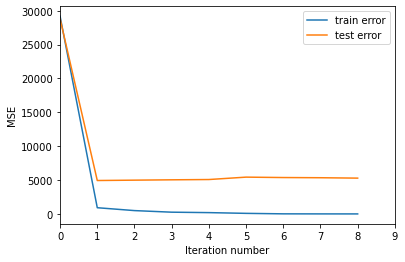

Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 4757.904358876503
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 7467.285515733801


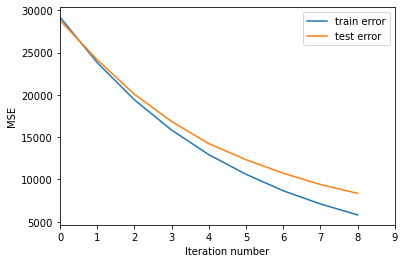

Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 24480.440446243687
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 24620.646088856618


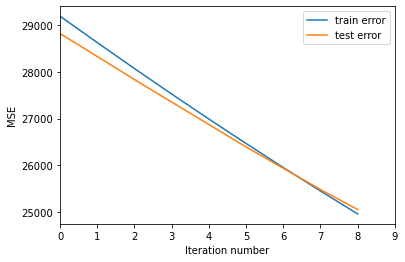

Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.001 на тренировочной выборке: 28678.655028557827
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.001 на тестовой выборке: 28365.594858941833


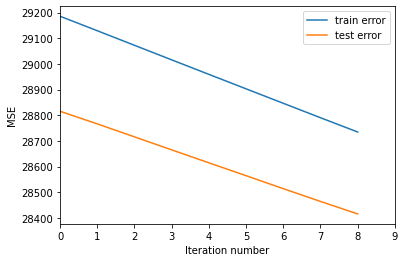

Ошибка алгоритма из 9 деревьев глубиной 9     с шагом 1 на тренировочной выборке: 0.0001943900098066171
Ошибка алгоритма из 9 деревьев глубиной 9     с шагом 1 на тестовой выборке: 6729.012740426822


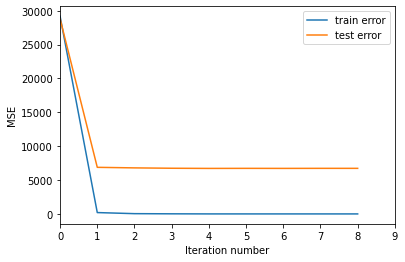

Ошибка алгоритма из 9 деревьев глубиной 9     с шагом 0.1 на тренировочной выборке: 4458.40967690187
Ошибка алгоритма из 9 деревьев глубиной 9     с шагом 0.1 на тестовой выборке: 7726.532286339191


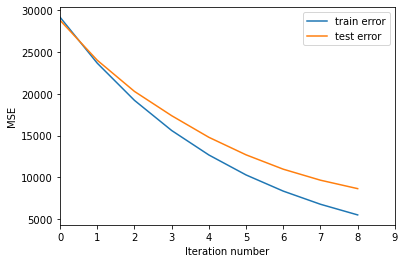

Ошибка алгоритма из 9 деревьев глубиной 9     с шагом 0.01 на тренировочной выборке: 24388.558729210632
Ошибка алгоритма из 9 деревьев глубиной 9     с шагом 0.01 на тестовой выборке: 24688.706034521725


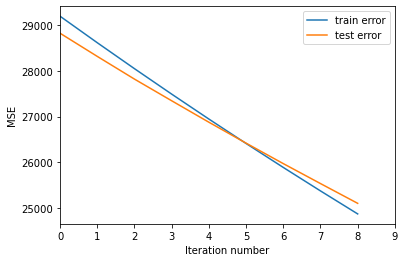

Ошибка алгоритма из 9 деревьев глубиной 9     с шагом 0.001 на тренировочной выборке: 28668.566461430586
Ошибка алгоритма из 9 деревьев глубиной 9     с шагом 0.001 на тестовой выборке: 28366.092125654963


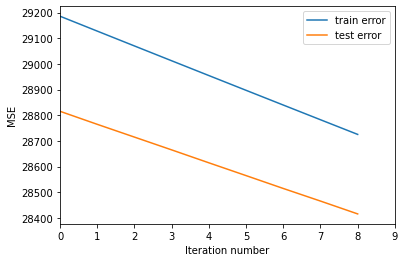

Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 912.9963064024118
Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4710.259224030476


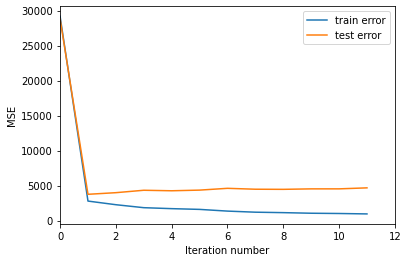

Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 4464.915420091051
Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 5546.881682435871


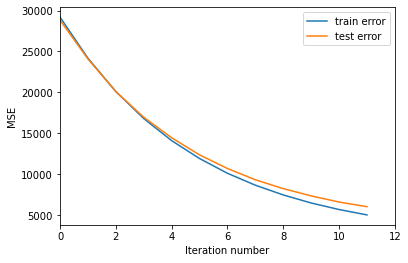

Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 23525.872418489875
Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 23417.059207503262


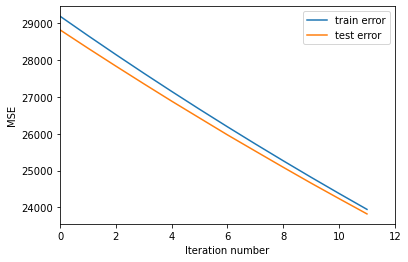

Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 0.001 на тренировочной выборке: 28559.74645292158
Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 0.001 на тестовой выборке: 28223.970346673555


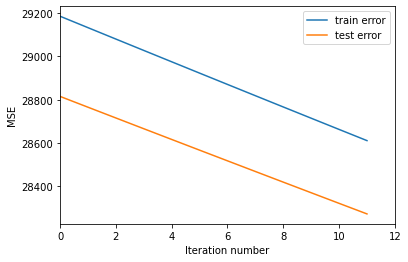

Ошибка алгоритма из 12 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 81.20811298641638
Ошибка алгоритма из 12 деревьев глубиной 5     с шагом 1 на тестовой выборке: 5838.753285825486


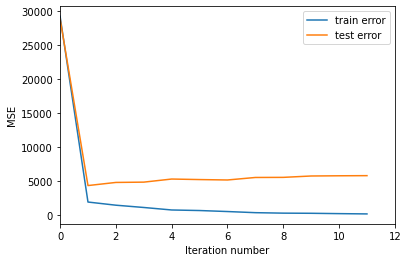

Ошибка алгоритма из 12 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 3387.18460249077
Ошибка алгоритма из 12 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 5817.220333310197


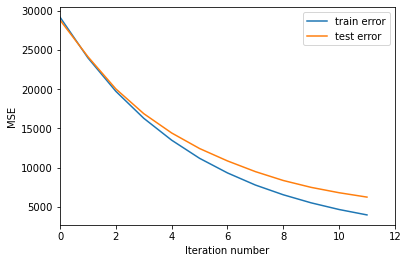

Ошибка алгоритма из 12 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 23307.02852158476
Ошибка алгоритма из 12 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 23403.68311898307


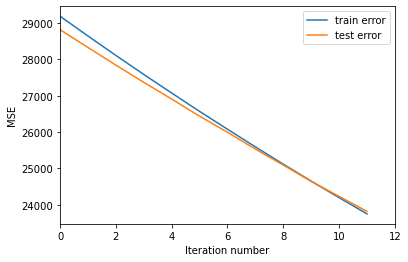

Ошибка алгоритма из 12 деревьев глубиной 5     с шагом 0.001 на тренировочной выборке: 28536.986925995436
Ошибка алгоритма из 12 деревьев глубиной 5     с шагом 0.001 на тестовой выборке: 28230.327819486567


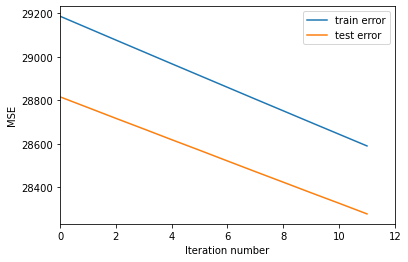

Ошибка алгоритма из 12 деревьев глубиной 7     с шагом 1 на тренировочной выборке: 0.2995430172039662
Ошибка алгоритма из 12 деревьев глубиной 7     с шагом 1 на тестовой выборке: 5339.072007773764


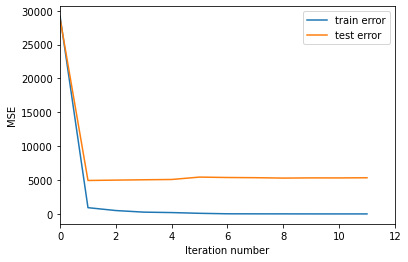

Ошибка алгоритма из 12 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 2644.4484258816065
Ошибка алгоритма из 12 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 5848.1050557229255


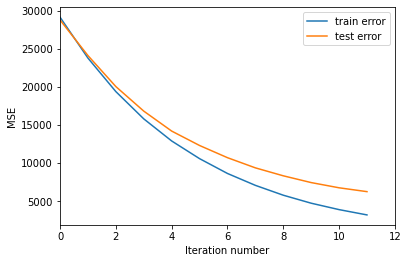

Ошибка алгоритма из 12 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 23089.128040693155
Ошибка алгоритма из 12 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 23369.56569175832


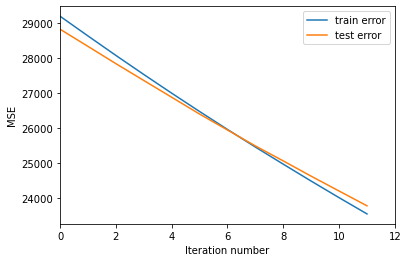

Ошибка алгоритма из 12 деревьев глубиной 7     с шагом 0.001 на тренировочной выборке: 28511.311875534833
Ошибка алгоритма из 12 деревьев глубиной 7     с шагом 0.001 на тестовой выборке: 28216.128885618207


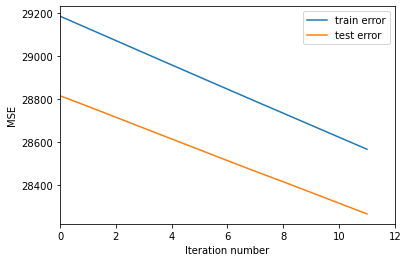

Ошибка алгоритма из 12 деревьев глубиной 9     с шагом 1 на тренировочной выборке: 4.905659631602488e-07
Ошибка алгоритма из 12 деревьев глубиной 9     с шагом 1 на тестовой выборке: 6729.303401637828


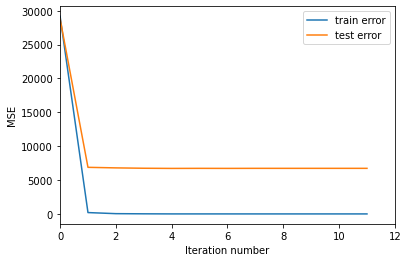

Ошибка алгоритма из 12 деревьев глубиной 9     с шагом 0.1 на тренировочной выборке: 2388.2293767510987
Ошибка алгоритма из 12 деревьев глубиной 9     с шагом 0.1 на тестовой выборке: 6103.003269709798


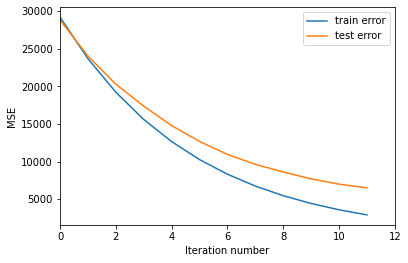

Ошибка алгоритма из 12 деревьев глубиной 9     с шагом 0.01 на тренировочной выборке: 22972.893147109877
Ошибка алгоритма из 12 деревьев глубиной 9     с шагом 0.01 на тестовой выборке: 23517.44908677376


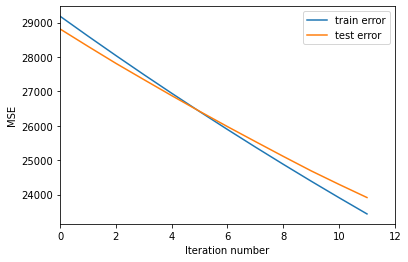

Ошибка алгоритма из 12 деревьев глубиной 9     с шагом 0.001 на тренировочной выборке: 28498.17143214808
Ошибка алгоритма из 12 деревьев глубиной 9     с шагом 0.001 на тестовой выборке: 28217.30850877123


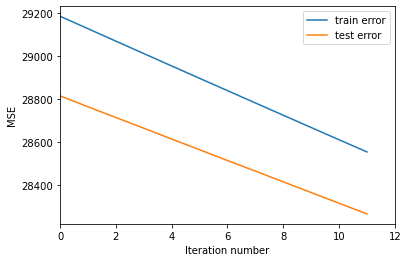

Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 697.7904044817348
Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4999.5138976904755


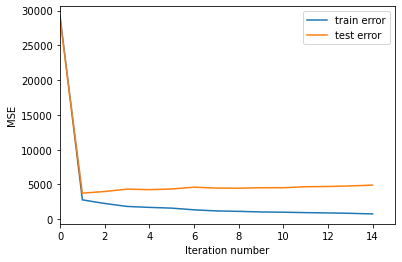

Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 3337.579523822693
Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 4582.087912180724


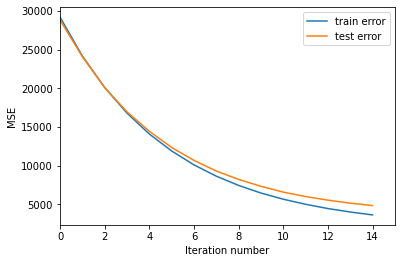

Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 22309.55912543817
Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 22245.72705875494


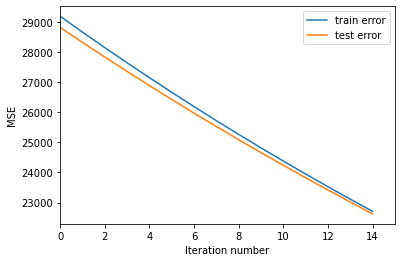

Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.001 на тренировочной выборке: 28405.52756520682
Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.001 на тестовой выборке: 28078.26865979354


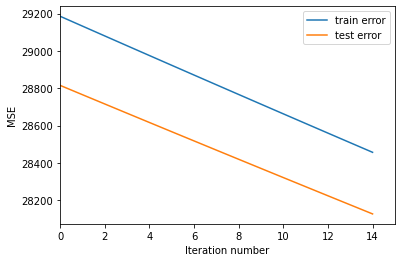

Ошибка алгоритма из 15 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 31.37417579429682
Ошибка алгоритма из 15 деревьев глубиной 5     с шагом 1 на тестовой выборке: 6032.194745784091


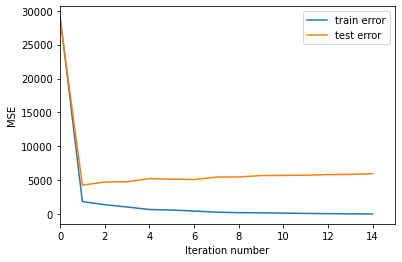

Ошибка алгоритма из 15 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 2167.578886675444
Ошибка алгоритма из 15 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 4978.181588741501


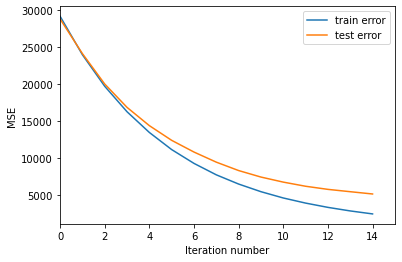

Ошибка алгоритма из 15 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 22038.79033407824
Ошибка алгоритма из 15 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 22220.17618766023


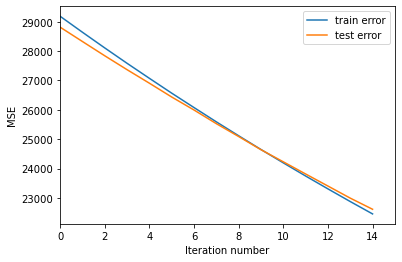

Ошибка алгоритма из 15 деревьев глубиной 5     с шагом 0.001 на тренировочной выборке: 28377.12273666805
Ошибка алгоритма из 15 деревьев глубиной 5     с шагом 0.001 на тестовой выборке: 28085.68070910959


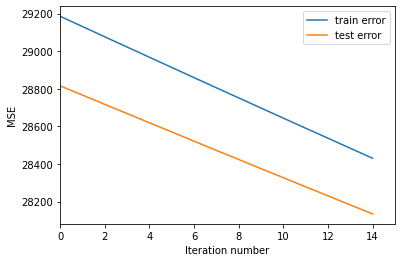

Ошибка алгоритма из 15 деревьев глубиной 7     с шагом 1 на тренировочной выборке: 0.010936243082217445
Ошибка алгоритма из 15 деревьев глубиной 7     с шагом 1 на тестовой выборке: 5341.489128645241


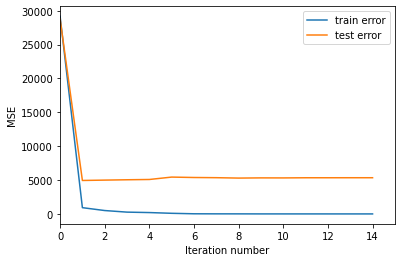

Ошибка алгоритма из 15 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 1487.8287818456658
Ошибка алгоритма из 15 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 5051.981961242174


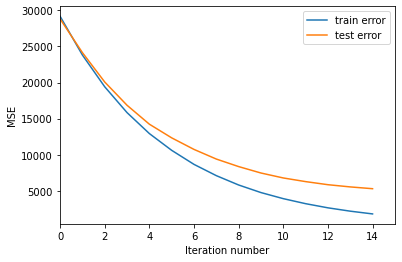

Ошибка алгоритма из 15 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 21784.662310854677
Ошибка алгоритма из 15 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 22194.997849751486


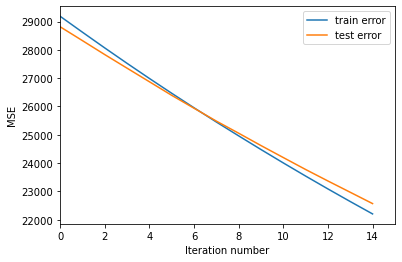

Ошибка алгоритма из 15 деревьев глубиной 7     с шагом 0.001 на тренировочной выборке: 28345.36192747889
Ошибка алгоритма из 15 деревьев глубиной 7     с шагом 0.001 на тестовой выборке: 28069.85886393597


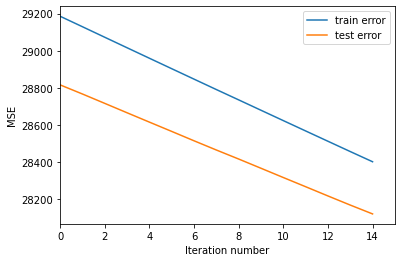

Ошибка алгоритма из 15 деревьев глубиной 9     с шагом 1 на тренировочной выборке: 3.6674011213954748e-09
Ошибка алгоритма из 15 деревьев глубиной 9     с шагом 1 на тестовой выборке: 6729.310809012542


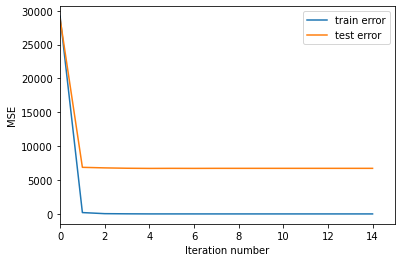

Ошибка алгоритма из 15 деревьев глубиной 9     с шагом 0.1 на тренировочной выборке: 1278.6500619589378
Ошибка алгоритма из 15 деревьев глубиной 9     с шагом 0.1 на тестовой выборке: 5171.074743171635


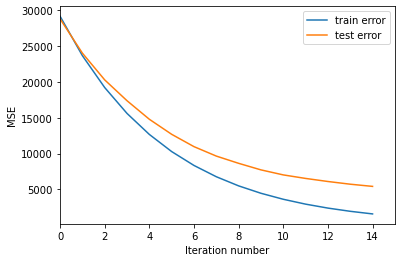

Ошибка алгоритма из 15 деревьев глубиной 9     с шагом 0.01 на тренировочной выборке: 21641.637278751266
Ошибка алгоритма из 15 деревьев глубиной 9     с шагом 0.01 на тестовой выборке: 22412.017311741027


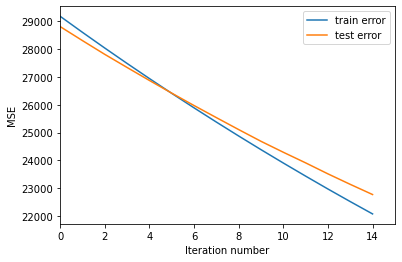

Ошибка алгоритма из 15 деревьев глубиной 9     с шагом 0.001 на тренировочной выборке: 28328.796219662356
Ошибка алгоритма из 15 деревьев глубиной 9     с шагом 0.001 на тестовой выборке: 28071.6831638484


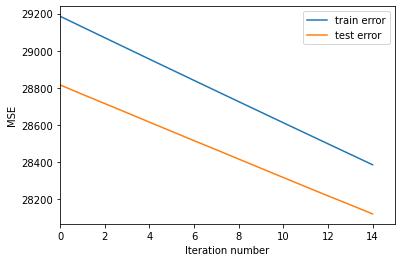

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 31.031505889050532
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тестовой выборке: 6066.560721831527


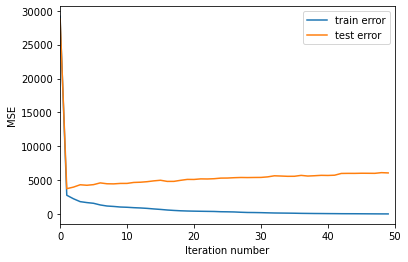

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1388.069695915288
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3346.2092132656335


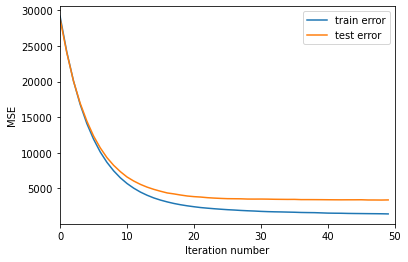

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 12355.520936658155
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 12840.96718617303


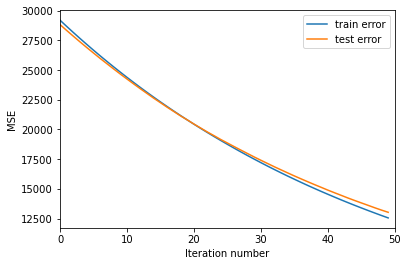

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.001 на тренировочной выборке: 26672.881978749505
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.001 на тестовой выборке: 26433.470281962684


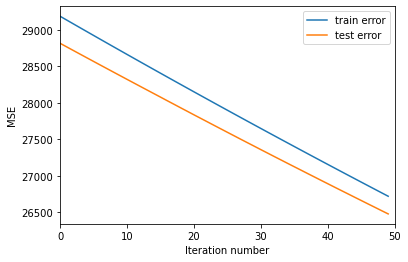

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 0.0003592448098008583
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 1 на тестовой выборке: 5988.276398701681


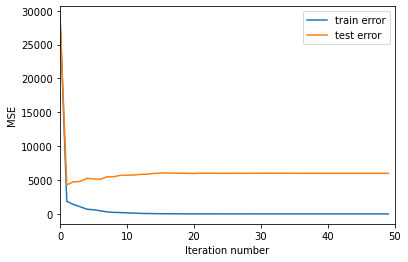

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 248.81020333169727
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 4091.8280019318604


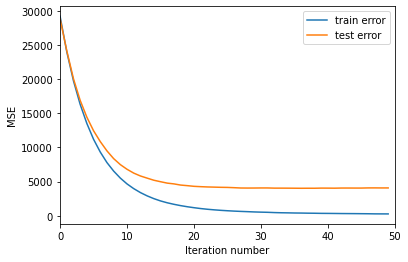

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 11628.640435163421
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 12778.524980728755


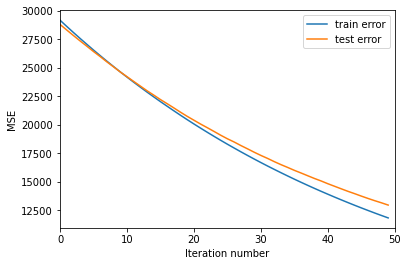

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.001 на тренировочной выборке: 26579.486401624607
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.001 на тестовой выборке: 26445.11677803003


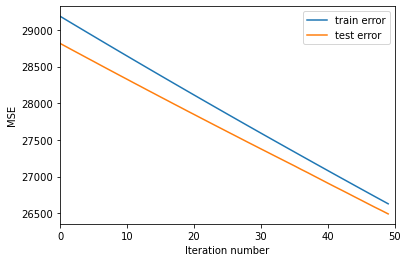

Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 1 на тренировочной выборке: 6.8472168881422766e-15
Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 1 на тестовой выборке: 5340.348822580982


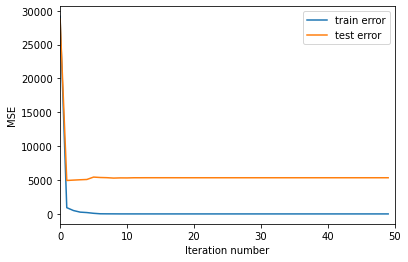

Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 9.047904732388652
Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 4380.5593947139905


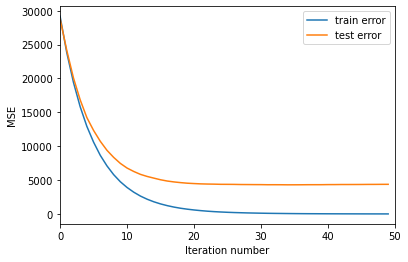

Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 11074.533713108063
Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 12634.998573761572


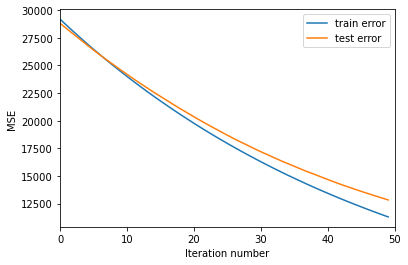

Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.001 на тренировочной выборке: 26478.26490138026
Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.001 на тестовой выборке: 26410.471517289618


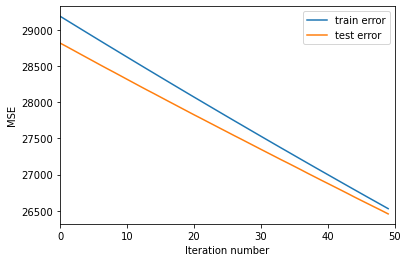

Ошибка алгоритма из 50 деревьев глубиной 9     с шагом 1 на тренировочной выборке: 0.0
Ошибка алгоритма из 50 деревьев глубиной 9     с шагом 1 на тестовой выборке: 6729.31084898934


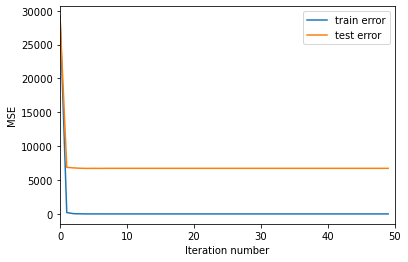

Ошибка алгоритма из 50 деревьев глубиной 9     с шагом 0.1 на тренировочной выборке: 1.008869231398873
Ошибка алгоритма из 50 деревьев глубиной 9     с шагом 0.1 на тестовой выборке: 4318.015673008344


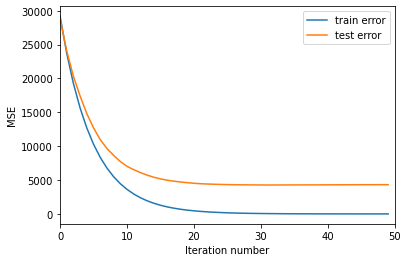

Ошибка алгоритма из 50 деревьев глубиной 9     с шагом 0.01 на тренировочной выборке: 10782.757776272276
Ошибка алгоритма из 50 деревьев глубиной 9     с шагом 0.01 на тестовой выборке: 13083.726873292411


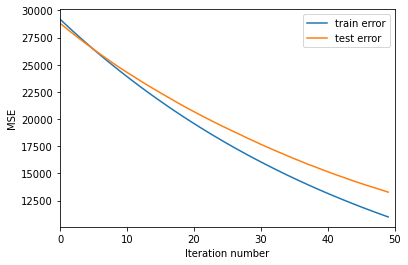

Ошибка алгоритма из 50 деревьев глубиной 9     с шагом 0.001 на тренировочной выборке: 26426.025909649798
Ошибка алгоритма из 50 деревьев глубиной 9     с шагом 0.001 на тестовой выборке: 26425.901493170215


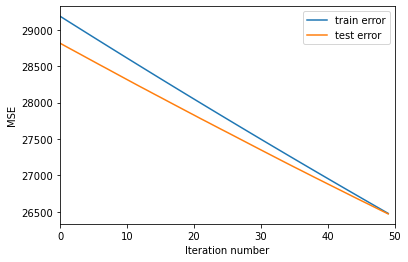

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 0.47233647008348006
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 1 на тестовой выборке: 6023.405355368732


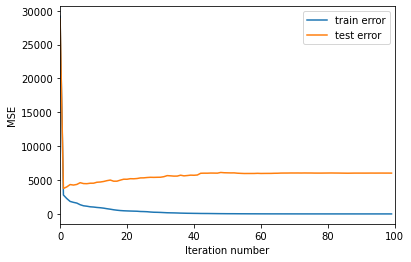

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 873.5367812291203
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3472.2361607708694


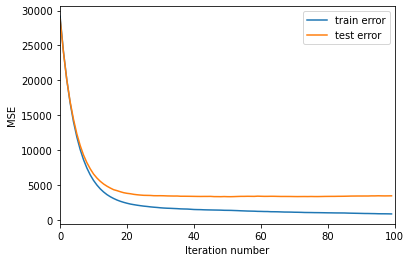

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 6006.167728293951
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 6993.115301280108


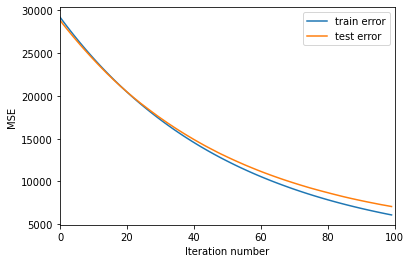

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.001 на тренировочной выборке: 24397.273127657198
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.001 на тестовой выборке: 24250.106773059488


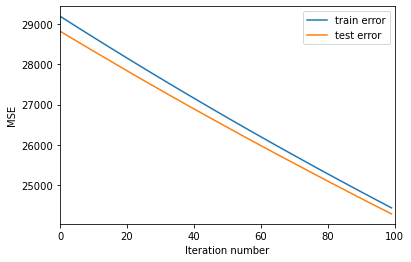

Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 4.5769833612165457e-11
Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 1 на тестовой выборке: 5988.362192243472


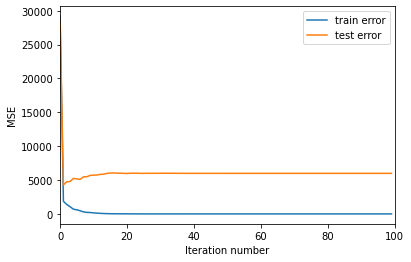

Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 64.79020457638285
Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 4094.150794728823


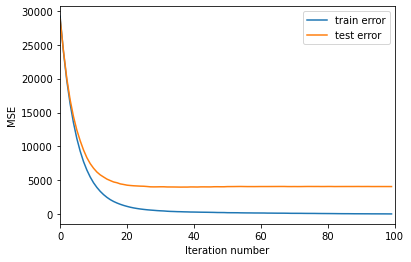

Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 4975.73157101661
Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 7060.554887324901


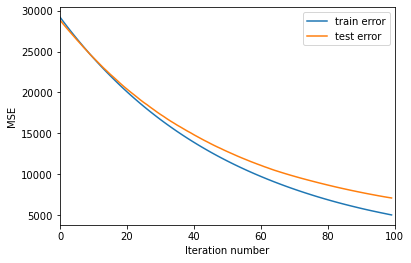

Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.001 на тренировочной выборке: 24213.19786950652
Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.001 на тестовой выборке: 24243.864865412113


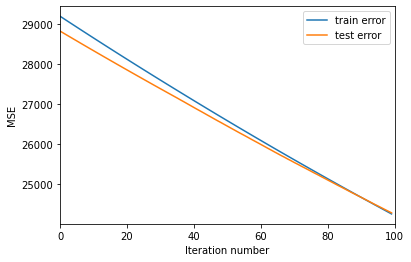

Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 1 на тренировочной выборке: 0.0
Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 1 на тестовой выборке: 5340.348826692988


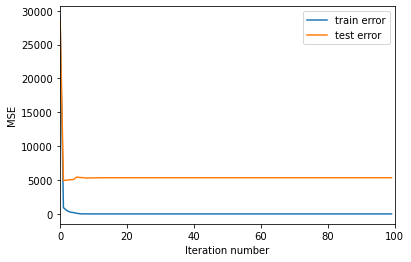

Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 0.6077998129674329
Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 4396.988271248098


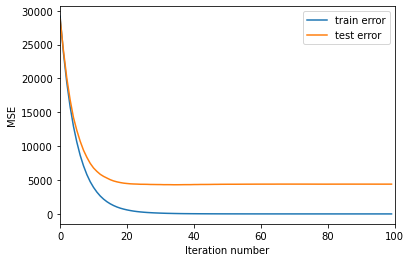

Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 4272.356543752614
Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 7020.4655124884675


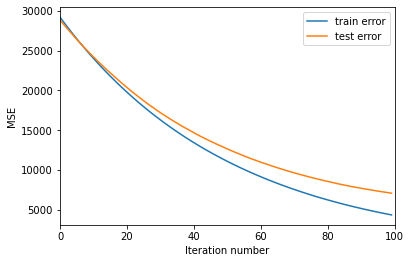

Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.001 на тренировочной выборке: 24027.18637069833
Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.001 на тестовой выборке: 24212.410161486256


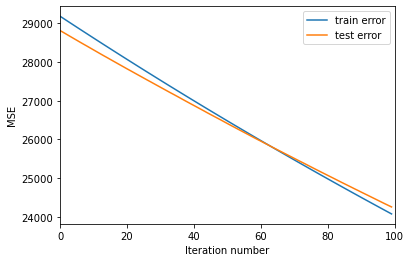

Ошибка алгоритма из 100 деревьев глубиной 9     с шагом 1 на тренировочной выборке: 0.0
Ошибка алгоритма из 100 деревьев глубиной 9     с шагом 1 на тестовой выборке: 6729.31084898934


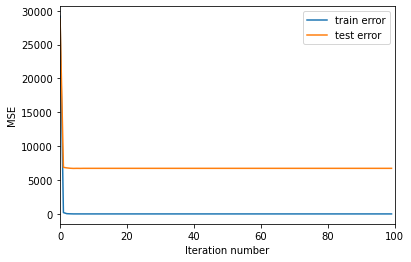

Ошибка алгоритма из 100 деревьев глубиной 9     с шагом 0.1 на тренировочной выборке: 0.0001473935815066329
Ошибка алгоритма из 100 деревьев глубиной 9     с шагом 0.1 на тестовой выборке: 4323.493367853379


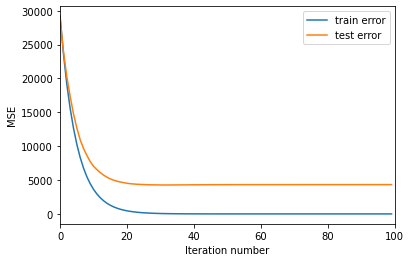

Ошибка алгоритма из 100 деревьев глубиной 9     с шагом 0.01 на тренировочной выборке: 4005.2020934869665
Ошибка алгоритма из 100 деревьев глубиной 9     с шагом 0.01 на тестовой выборке: 7306.614888371297


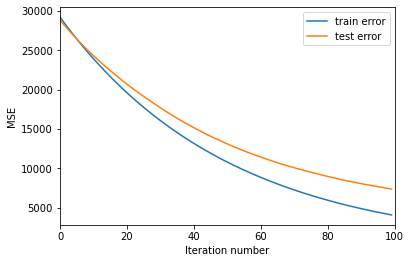

Ошибка алгоритма из 100 деревьев глубиной 9     с шагом 0.001 на тренировочной выборке: 23929.379901795783
Ошибка алгоритма из 100 деревьев глубиной 9     с шагом 0.001 на тестовой выборке: 24298.850318106804


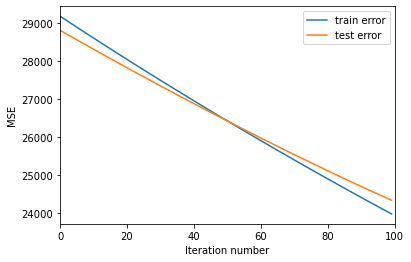

In [10]:

n_trees = [3, 5, 7, 9, 12, 15, 50, 100]
max_depth = [3, 5, 7, 9]
eta = [1, 0.1, 0.01, 0.001]

for tree in n_trees:
    for depth in max_depth:
        for el in eta:
            coefs = [1] * tree
            gb = GBM(max_depth=depth, n_trees=tree, eta=el)
            trees, train_errors, test_errors = gb.fit(X_train, y_train, X_test, y_test, coefs)
            evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, el, gb, tree, depth)
            get_error_plot(tree, train_errors, test_errors)

При повышении количества деревьев в ансамбле повышается точность модели (правда после 50 деревьев этот тезис ставится под сомнение)). При уверичении глубины каждого дерева растет точность предсказаний на тренировочной выборке, но при этом увеличивается переобучение (чем глубже дерево, тем больше переобучение). при скорости обучения равной 1 алгоритм расходится, поэтому из перебранных гиперпараметров самым лучшим вариантом считаю 50 деревьев, глубина 3 и скорость 0.1.
при необходимости более шустрых предсказаний с не очень сильно страдающем качестве можно ограничится 15 деревьями (ошибка примерно на 1000 выше, но и переобучение модели чуть меньше)

Попробуем с самопальным деревом

In [11]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [12]:
# И класс терминального узла (листа)

class Leaf:
    
    counter = 0
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        self.prediction_regressor = self.predict_regressor()
        type(self).counter += 1
        
    def predict_regressor(self):
        return np.mean(self.labels)
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction        

In [59]:
class DecisionTree():
    
    def __init__(self, max_depth=0, max_leaf=0, min_samples_leaf=1, criterion='gini'):
        self.max_depth = max_depth
        self.max_leaf = max_leaf
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        Leaf.counter = 0
        
    # Расчет критерия Джини

    def gini(self, labels):
        #  подсчет количества объектов разных классов
        classes = {}
        for label in labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1

        #  расчет критерия
        impurity = 1
        for label in classes:
            p = classes[label] / len(labels)
            impurity -= p ** 2

        return impurity
    
    def entropy(self, labels):
        classes = np.unique(labels)
        entropy = -sum([((labels == classes[i]).sum() / len(labels)) * \
                  np.log2((labels == classes[i]).sum() / len(labels)) \
                  for i in range(len(classes))])
        return entropy
    
    def quality_entropy(self, left_labels, right_labels, current_entropy):
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
        return current_entropy - p * self.entropy(left_labels) - (1 - p) * self.entropy(right_labels)
    
    def quality(self, left_labels, right_labels, current_gini):

        # доля выбоки, ушедшая в левое поддерево
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])

        return current_gini - p * self.gini(left_labels) - (1 - p) * self.gini(right_labels)
    
        # Разбиение датасета в узле

    def split(self, data, labels, index, t):

        left = np.where(data[:, index] <= t)
        right = np.where(data[:, index] > t)

        true_data = data[left]
        false_data = data[right]
        true_labels = labels[left]
        false_labels = labels[right]

        return true_data, false_data, true_labels, false_labels
    
#         # Построение дерева с помощью рекурсивной функции

    def build_tree(self, data, labels, ind=0):
        
        indx = ind
        indx +=1

        quality, t, index = self.find_best_split(data, labels)

        if len(labels) < self.min_samples_leaf * 2:
#             print(1)
            return Leaf(data, labels)

        #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
        if quality == 0:
#             print(2)
            return Leaf(data, labels)

        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
        
#         проверяем количество листьев в дереве:
        if (Leaf.counter > self.max_leaf - 2) and self.max_leaf != 0:
#             print(3)
            return Leaf(data, labels)
#         бывают расхождения по максимальному количеству листьев +- 2 штуки, как железно ограничить так и не смог придумать)
#         при долгих размышлениях я пришел к выводу, что использование
#         только этого критерия останова нецелесообразно или во всяком случае слишком малое его 
#         значение - можно не успеть выйти из первой рекурсии, а такой исход мне представляется
#         не очень веселым, т.к. у нас будет всего полдерева и при построении 
#         предикта алгоритм поломается сразу на корневом узле

        #  Проверяем глубину узла
        if indx == self.max_depth + 1:
#             print(indx, self.max_depth)
            return Leaf(data, labels)

        # Рекурсивно строим два поддерева
        true_branch = self.build_tree(true_data, true_labels, indx)
        false_branch = self.build_tree(false_data, false_labels, indx)

        node = Node(index, t, true_branch, false_branch)
        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
        return node
    
    def pred_object(self, obj, node):
#         print(node.index, 1, node.true_branch.index, 2, node.false_branch.index)

        #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer
        i = node.index
        
        if obj[i] <= node.t:
            return self.pred_object(obj, node.true_branch)
        else:
            return self.pred_object(obj, node.false_branch)
        
    def predict(self, data, tree):

        pred = []
        for obj in data:
            prediction = self.pred_object(obj, tree)
            pred.append(prediction)
        return pred

In [60]:
class DecisionTreeRegressor_(DecisionTree):
    
    def quality(self, left_labels, right_labels, current_var):
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
        return current_var - p * np.var(left_labels) - (1 - p) * np.var(right_labels)
    
    def find_best_split(self, data, labels):
        
        current_criterion = np.var(labels)

        best_quality = 0
        best_t = None
        best_index = None

        n_features = data.shape[1]

        for index in range(n_features):
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique([row[index] for row in data])

            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                #  пропускаем разбиения, в которых в узле остается объектов меньше, чем указано гиперпараметром
                if len(true_data) < self.min_samples_leaf or len(false_data) < self.min_samples_leaf:
                    continue

                current_quality = self.quality(true_labels, false_labels, current_criterion)

                #  выбираем порог, на котором получается максимальный прирост качества
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index

        return best_quality, best_t, best_index
    
    def pred_object(self, obj, node):

        #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, Leaf):
            answer = node.prediction_regressor
            return answer
        i = node.index
        
        if obj[i] <= node.t:
            return self.pred_object(obj, node.true_branch)
        else:
            return self.pred_object(obj, node.false_branch)

In [53]:
class GBM_():
    
    def __init__(self, eta=0.1, n_trees=5, max_depth=5):
        self.eta = eta
        self.max_depth = max_depth
        self.n_trees = n_trees
    
    def predict(self, X, trees_list, coef_list, eta, tree_list):
        return np.array([sum([eta * coef * alg.predict([x], tree)[0] for alg, coef, tree in zip(trees_list, coef_list, tree_list)])for x in X])
    
    def mse(self, y, y_pred):
        return (sum((y - y_pred) ** 2)) / len(y)
    
    def bias(self, y, z):
        return (y - z)
    
    def fit(self, X_train, y_train, X_test, 
            y_test, coefs): 
            
        
        trees = []
        trees_ = []
        train_errors = []
        test_errors = []
        
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor_(max_depth=self.max_depth)
            if len(trees) == 0:
                my_tree = tree.build_tree(X_train, y_train)
                train_errors.append(self.mse(y_train, self.predict(X_train, trees, coefs, self.eta, trees_)))
                test_errors.append(self.mse(y_test, self.predict(X_test, trees, coefs, self.eta, trees_)))
            else:
                target = self.predict(X_train, trees, coefs, self.eta, trees_)
                my_tree = tree.build_tree(X_train, self.bias(y_train, target))
                train_errors.append(self.mse(y_train, self.predict(X_train, trees, coefs, self.eta, trees_)))
                test_errors.append(self.mse(y_test, self.predict(X_test, trees, coefs, self.eta, trees_)))
            
            trees.append(tree)
            trees_.append(my_tree)
        return trees, trees_, train_errors, test_errors

In [38]:
def evaluate_alg_(X_train, X_test, y_train, y_test, trees, trees_, coefs, eta, gb, n_trees, max_depth):
    train_prediction = gb.predict(X_train, trees, coefs, eta, trees_)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {gb.mse(y_train, train_prediction)}')

    test_prediction = gb.predict(X_test, trees, coefs, eta, trees_)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {gb.mse(y_test, test_prediction)}')

Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 6470.999447836467
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 7329.440563392356


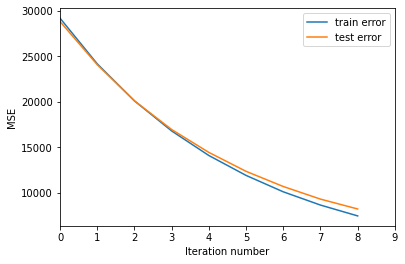

Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 24816.614221382297
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 24659.70549198883


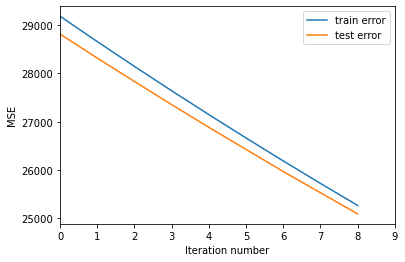

Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 5504.806079794414
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 7424.901643841981


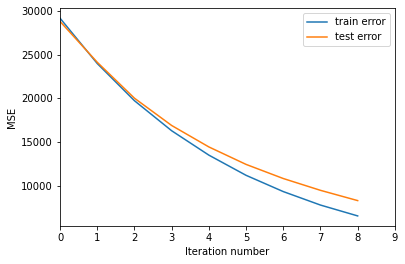

Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 24647.965764152887
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 24647.813867339974


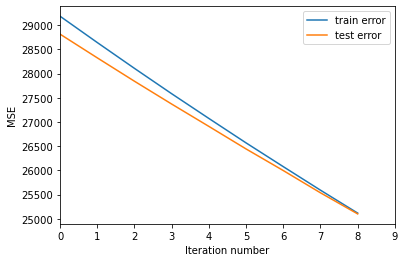

Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 4757.904358876503
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 7499.446005329486


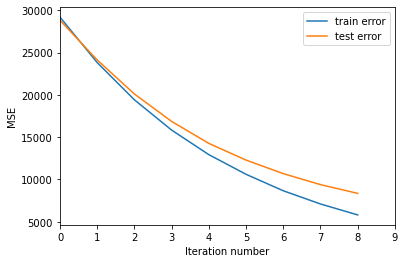

Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 24480.440446243687
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 24607.609210498977


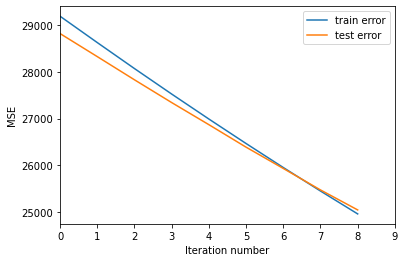

Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 4464.915420091051
Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 5548.518300239701


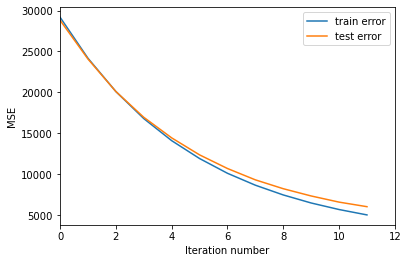

Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 23525.87241848988
Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 23420.636101985852


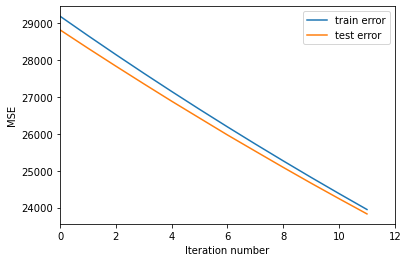

Ошибка алгоритма из 12 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 3387.18460249077
Ошибка алгоритма из 12 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 5733.773871501197


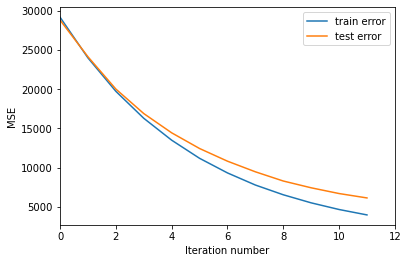

Ошибка алгоритма из 12 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 23307.02852158476
Ошибка алгоритма из 12 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 23400.62964489457


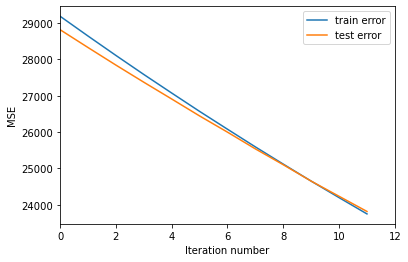

Ошибка алгоритма из 12 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 2644.4484258816065
Ошибка алгоритма из 12 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 5918.732448903812


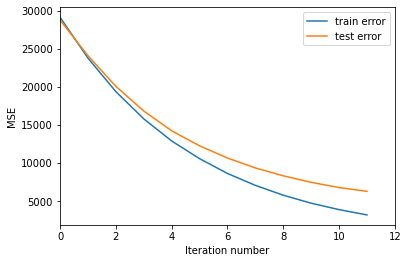

Ошибка алгоритма из 12 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 23089.128040693155
Ошибка алгоритма из 12 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 23359.026822320604


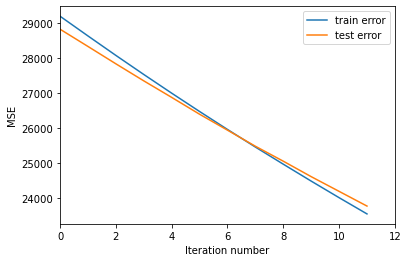

Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 3337.5795238226933
Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 4583.235930268256


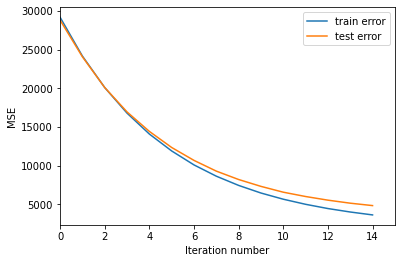

Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 22309.55912543817
Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 22252.658194736072


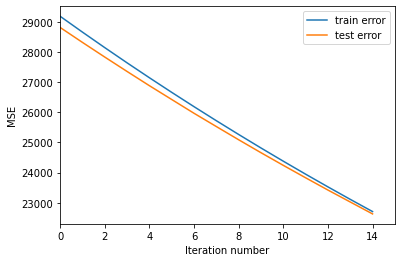

Ошибка алгоритма из 15 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 2167.578886675444
Ошибка алгоритма из 15 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 4853.700898430904


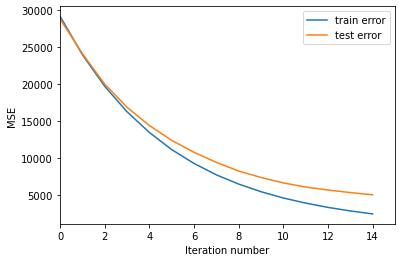

Ошибка алгоритма из 15 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 22038.79033407824
Ошибка алгоритма из 15 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 22220.923043211187


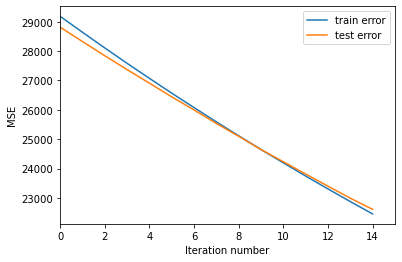

Ошибка алгоритма из 15 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 1487.8287818456665
Ошибка алгоритма из 15 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 5101.649753179751


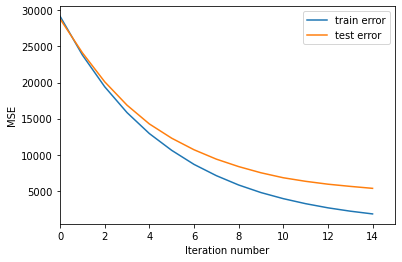

Ошибка алгоритма из 15 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 21784.662310854677
Ошибка алгоритма из 15 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 22184.936450962057


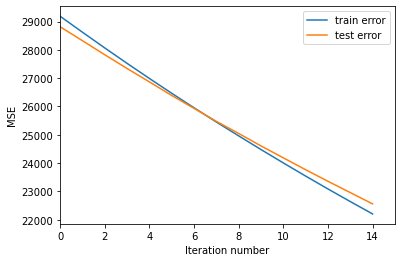

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1388.0696959152879
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3286.296109985073


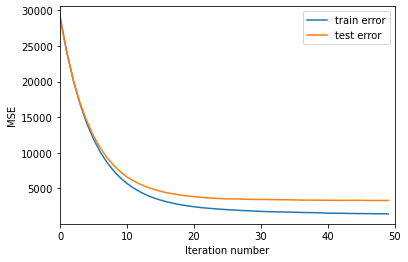

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 12355.520936658155
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 12837.986096791334


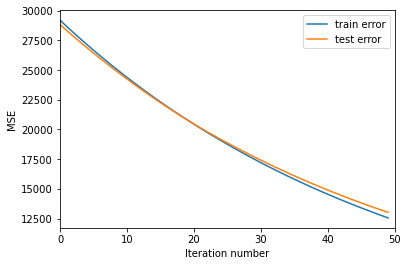

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 248.81020333169727
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 4007.787045830276


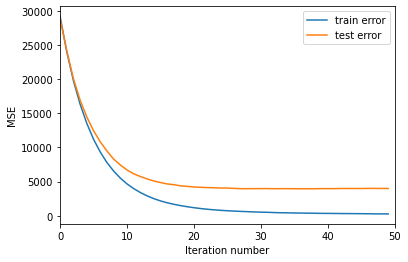

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 11628.640435163421
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 12724.52898710095


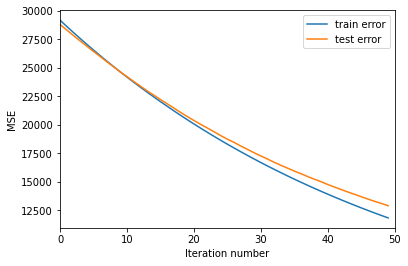

Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 9.047904732388657
Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 4492.365312053147


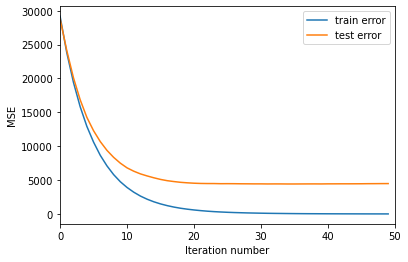

Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 11074.533713108063
Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 12670.26152142772


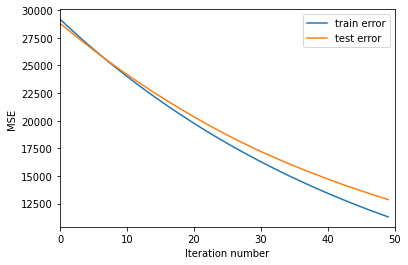

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 873.5367812291206
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3379.618413411944


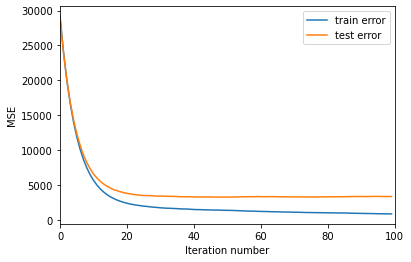

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 6006.16772829395
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 6981.882112031126


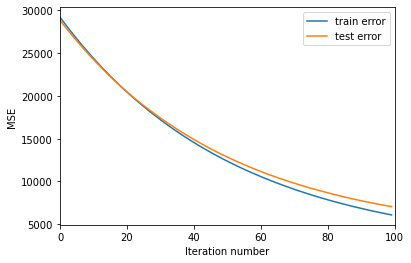

Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 64.79020457638285
Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3976.8174324592537


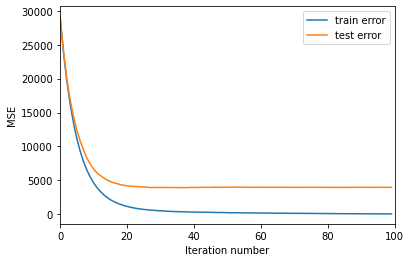

Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 4975.73157101661
Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 6911.759509071816


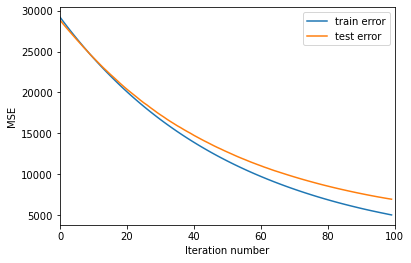

Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 0.6077998129674328
Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 4511.9370616273945


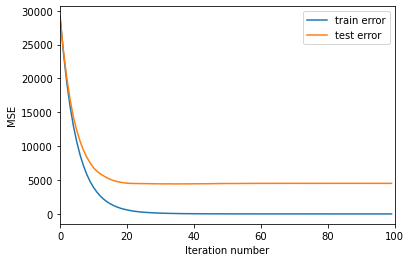

Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 4272.356543752614
Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 7110.499329501511


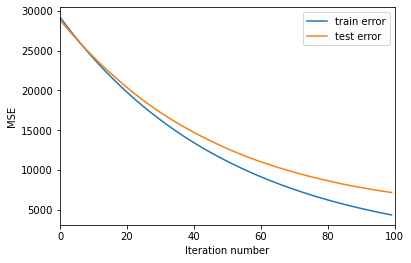

In [65]:
%%time
# сетку немного урезал - уж очень долго перебирает))
n_trees = [9, 12, 15, 50, 100]
max_depth = [3, 5, 7]
eta = [0.1, 0.01]

for tree in n_trees:
    for depth in max_depth:
        for el in eta:
            coefs = [1] * tree
            gb = GBM_(max_depth=depth, n_trees=tree, eta=el)
            trees, trees_, train_errors, test_errors = gb.fit(X_train, y_train, X_test, y_test, coefs)
            evaluate_alg_(X_train, X_test, y_train, y_test, trees, trees_, coefs, el, gb, tree, depth)
            get_error_plot(tree, train_errors, test_errors)

Забавно: наилучшая комбинация гиперпараметров такая же, при этом на самописном дереве ошибка на тестовой выборке даже меньше на 60 (на трейне ошибка без учета дробной части равна)
Похоже, что иногда на самописных алгоритмах результат может быть лучше 
(пусть и в пределах погрешности), хотя при другом random_state  в готовом дереве цифры могли бы быть и другими))

In [75]:
class GBM__():
    
    def __init__(self, eta=0.1, n_trees=5, max_depth=5, size_batch=0.5, random_state=-1):
        self.eta = eta
        self.max_depth = max_depth
        self.n_trees = n_trees
        self.size_batch = size_batch
        self.random_state = random_state
    
    def predict(self, X, trees_list, coef_list, eta):
        return np.array([sum([eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)])for x in X])
    
    def mse(self, y, y_pred):
        return (sum((y - y_pred) ** 2)) / len(y)
    
    def bias(self, y, z):
        return (y - z)
    
    def batch(self, X, y):
        size_ = int(len(X) * self.size_batch)
        train_ind = list(np.random.randint(X.shape[0], size=size_))
        y_batch = y[train_ind]
        X_batch = X[train_ind]
        return X_batch, y_batch
    
    def fit(self, X_train, y_train, X_test, 
            y_test, coefs): 
            
        if self.random_state != -1:
            np.random.seed(self.random_state)
        trees = []
        train_errors = []
        test_errors = []
        
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=13)
            if len(trees) == 0:
                X, y = self.batch(X_train, y_train)
                tree.fit(X, y)
                train_errors.append(self.mse(y_train, self.predict(X_train, trees, coefs, self.eta)))
                test_errors.append(self.mse(y_test, self.predict(X_test, trees, coefs, self.eta)))
            else:
                target = self.predict(X_train, trees, coefs, self.eta)
                X, y = self.batch(X_train, self.bias(y_train, target))
                tree.fit(X, y)
                train_errors.append(self.mse(y_train, self.predict(X_train, trees, coefs, self.eta)))
                test_errors.append(self.mse(y_test, self.predict(X_test, trees, coefs, self.eta)))
            
            trees.append(tree)
        return trees, train_errors, test_errors

Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 3618.7124836861553
Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 4509.9661559242


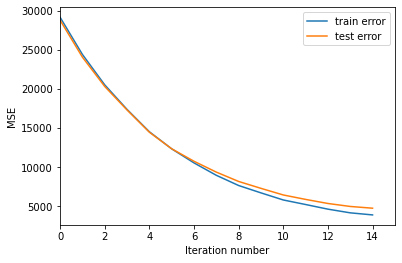

Ошибка алгоритма из 15 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 2708.38016575359
Ошибка алгоритма из 15 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 4496.934712226745


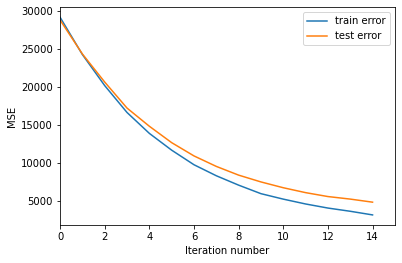

Ошибка алгоритма из 15 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 2503.844598853553
Ошибка алгоритма из 15 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 5109.395576345917


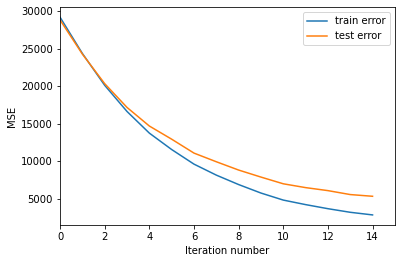

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1432.4507739662445
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3260.1148336751758


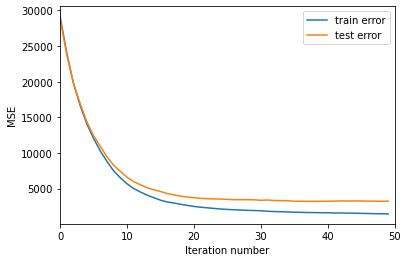

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 569.4250929332213
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3583.4819088844783


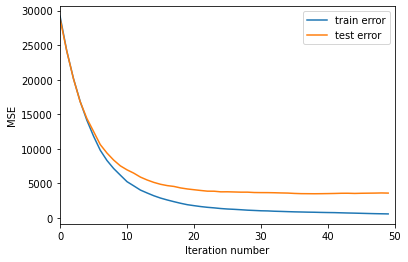

Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 280.5517209919824
Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 3929.089534404159


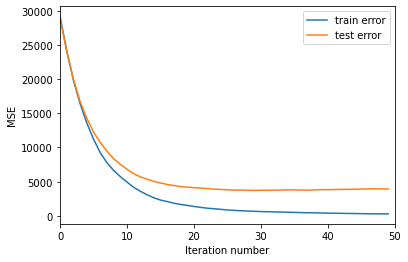

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 856.465765980979
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3948.3789389403833


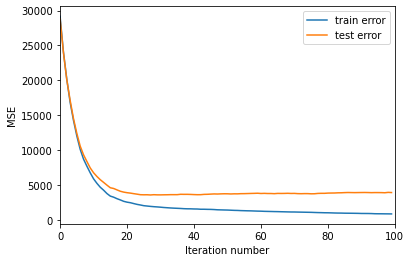

Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 170.54122755712385
Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 4006.1452818849207


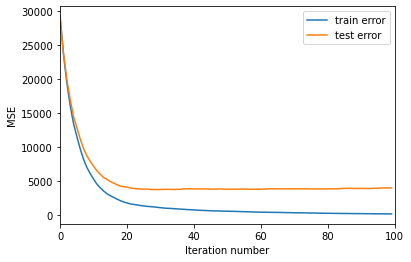

Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 40.76974548168575
Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 3765.8049944606005


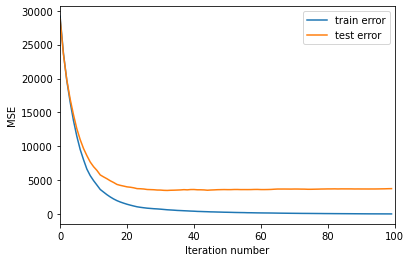

CPU times: user 22min 25s, sys: 720 ms, total: 22min 26s
Wall time: 22min 25s


In [83]:
%%time
n_trees = [15, 50, 100]
max_depth = [3, 5, 7]
eta = [0.1]

for tree in n_trees:
    for depth in max_depth:
        for el in eta:
            coefs = [1] * tree
            gb = GBM__(max_depth=depth, n_trees=tree, eta=el)
            trees, train_errors, test_errors = gb.fit(X_train, y_train, X_test, y_test, coefs)
            evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, el, gb, tree, depth)
            get_error_plot(tree, train_errors, test_errors)

Особо большого пркимущества стохастического градиентного бустинга не узрел, даже по времени... может, если размер батча будет меньше скорость и вырастет, а вот с точностью вопрос большой))